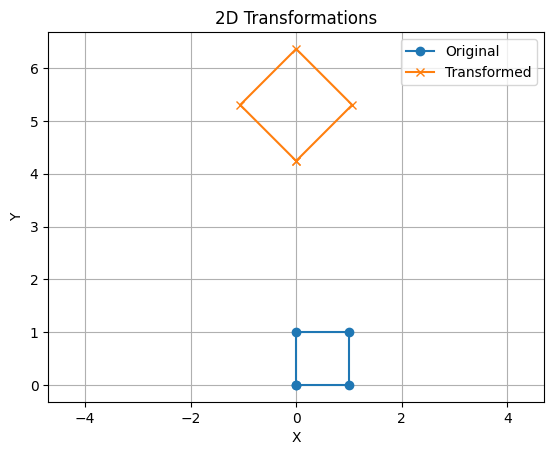

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to apply a transformation matrix to a set of points
def apply_transformation(points, transformation_matrix):
    transformed_points = []
    for point in points:
        p = np.array([point[0], point[1], 1])  # Convert to homogeneous coordinates
        tp = np.dot(transformation_matrix, p)  # Apply transformation
        transformed_points.append(tp[:2])  # Convert back to Cartesian coordinates
    return np.array(transformed_points)

# Define transformation matrices
def translation_matrix(tx, ty):
    return np.array([[1, 0, tx],
                     [0, 1, ty],
                     [0, 0, 1]])

def scaling_matrix(sx, sy):
    return np.array([[sx, 0, 0],
                     [0, sy, 0],
                     [0, 0, 1]])

def rotation_matrix(angle_deg):
    angle_rad = np.radians(angle_deg)
    return np.array([[np.cos(angle_rad), -np.sin(angle_rad), 0],
                     [np.sin(angle_rad),  np.cos(angle_rad), 0],
                     [0, 0, 1]])

def reflection_matrix(axis):
    if axis == 'x':
        return np.array([[1, 0, 0],
                         [0, -1, 0],
                         [0, 0, 1]])
    elif axis == 'y':
        return np.array([[-1, 0, 0],
                         [0, 1, 0],
                         [0, 0, 1]])

def shearing_matrix(shx, shy):
    return np.array([[1, shx, 0],
                     [shy, 1, 0],
                     [0, 0, 1]])

# Initial polygon (a square)
square = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

# Apply transformations
tx_matrix = translation_matrix(2, 2)
scale_matrix = scaling_matrix(1.5, 1.5)
rotate_matrix = rotation_matrix(45)
shear_matrix = shearing_matrix(0.5, 0)

# Composite transformation: Translate -> Scale -> Rotate
composite_matrix = rotate_matrix @ scale_matrix @ tx_matrix

# Apply composite transformation
transformed_square = apply_transformation(square, composite_matrix)

# Plot original and transformed shapes
plt.figure()
plt.plot(square[:, 0], square[:, 1], label='Original', marker='o')
plt.plot(transformed_square[:, 0], transformed_square[:, 1], label='Transformed', marker='x')
plt.legend()
plt.title("2D Transformations")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.axis('equal')
plt.show()

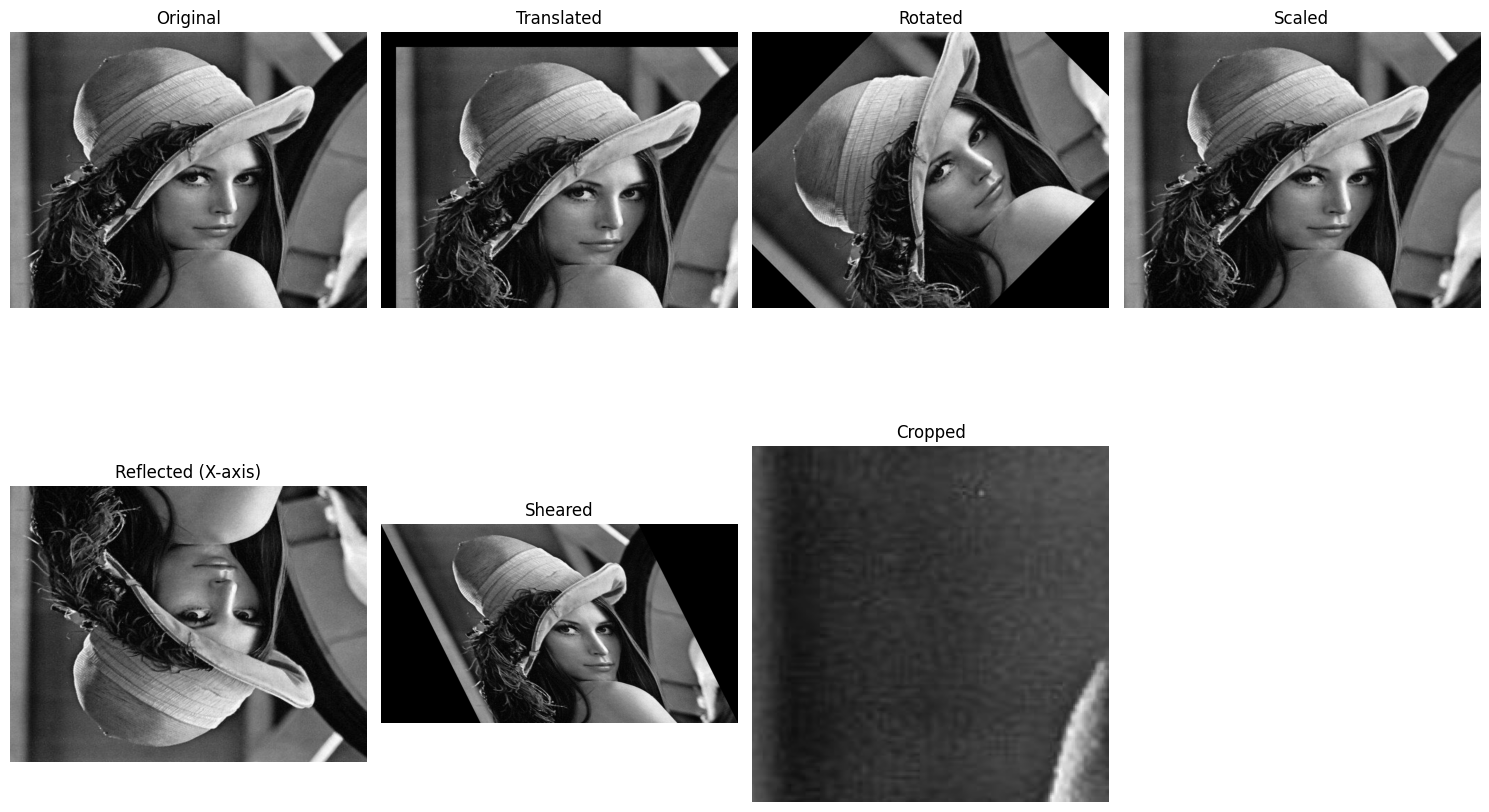

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/design 1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Image Translation
def translate_image(img, tx, ty):
    rows, cols = img.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(img, translation_matrix, (cols, rows))

# Image Rotation
def rotate_image(img, angle, scale=1.0):
    rows, cols = img.shape[:2]
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
    return cv2.warpAffine(img, rotation_matrix, (cols, rows))

# Image Scaling
def scale_image(img, sx, sy):
    return cv2.resize(img, None, fx=sx, fy=sy, interpolation=cv2.INTER_LINEAR)

# Image Reflection
def reflect_image(img, axis):
    if axis == 'x':
        return cv2.flip(img, 0)
    elif axis == 'y':
        return cv2.flip(img, 1)

# Image Shearing
def shear_image(img, shx, shy):
    rows, cols = img.shape[:2]
    shear_matrix = np.float32([[1, shx, 0], [shy, 1, 0]])
    return cv2.warpAffine(img, shear_matrix, (cols + int(shx * rows), rows + int(shy * cols)))

# Image Cropping
def crop_image(img, x_start, y_start, width, height):
    return img[y_start:y_start+height, x_start:x_start+width]

# Apply transformations
translated = translate_image(image, 50, 50)
rotated = rotate_image(image, 45)
scaled = scale_image(image, 1.5, 1.5)
reflected_x = reflect_image(image, 'x')
sheared = shear_image(image, 0.5, 0)
cropped = crop_image(image, 50, 50, 200, 200)

# Plot original and transformed images
images = [image, translated, rotated, scaled, reflected_x, sheared, cropped]
titles = ['Original', 'Translated', 'Rotated', 'Scaled', 'Reflected (X-axis)', 'Sheared', 'Cropped']

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()